In [1]:
import os
import sys

sys.path.insert(1, os.getcwd().replace('\\Assignment_4', ''))

import math
import mylibrary
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Question 1

In [2]:
x = np.array(mylibrary.linear_congruential_gen(a = 65, c = 0, m = 1021, n = 2000))
y = np.array(mylibrary.linear_congruential_gen(a = 572, m = 16381, c = 0, n = 2000))
bins = 25

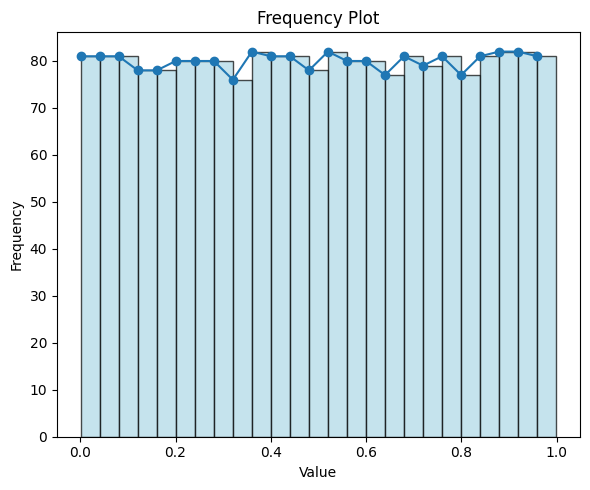

In [16]:
plt.figure(figsize=(6, 5))
counts, edges, _ = plt.hist(x, bins, color='lightblue', edgecolor='black', alpha=0.7)
plt.plot(edges[:-1], counts, marker='o', linestyle='-')
plt.title('Frequency Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

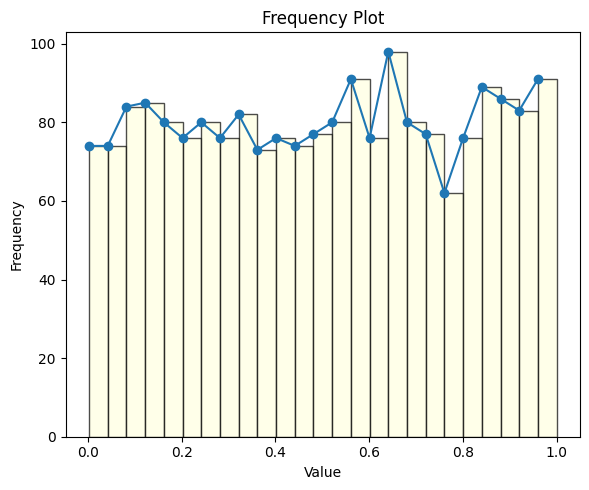

In [17]:
plt.figure(figsize=(6, 5))
counts, edges, _ = plt.hist(y, bins=bins, color='lightyellow', edgecolor='black', alpha=0.7)
plt.plot(edges[:-1], counts, marker='o', linestyle='-')
plt.title('Frequency Plot')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Question 2

In [ ]:
# integrand function for question
def func(x):
    return math.cos(x)

In [5]:
nos = []
integral_1 = []
integral_2 = []
integral_3 = []

i = 1000
while i <= 100000:
    nos.append(i)
    integral_1.append(mylibrary.monte_carlo_lcg(func=func, a = -(math.pi)/2, b = (math.pi)/2, step = i))
    integral_2.append(mylibrary.monte_carlo_lcg(func=func, a = -(math.pi)/2, b = (math.pi)/2, step = i, lc_a = 65, lc_c = 0, lc_m = 1021))
    integral_3.append(mylibrary.monte_carlo_lcg(func=func, a = -(math.pi)/2, b = (math.pi)/2, step = i, lc_a = 572, lc_c = 0, lc_m = 16381))
    i += 1000

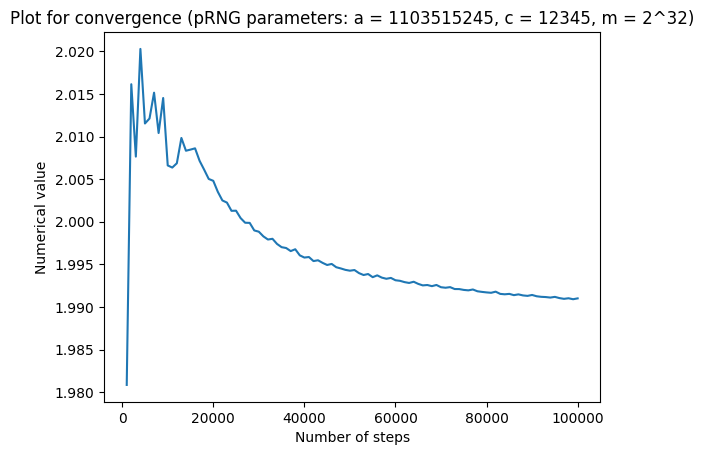

In [10]:
plt.plot(nos, integral_1)
plt.xlabel("Number of steps")
plt.ylabel("Numerical value")
plt.title("Plot for convergence (pRNG parameters: a = 1103515245, c = 12345, m = 2^32)")
plt.show()

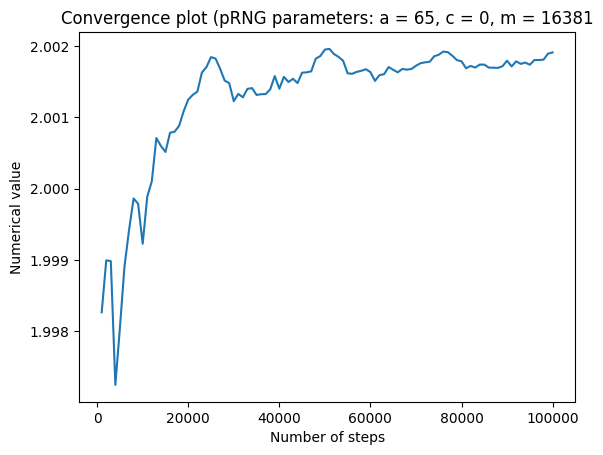

In [9]:
plt.plot(nos, integral_2)
plt.xlabel("Number of steps")
plt.ylabel("Numerical value")
plt.title("Convergence plot (pRNG parameters: a = 65, c = 0, m = 16381")
plt.show()

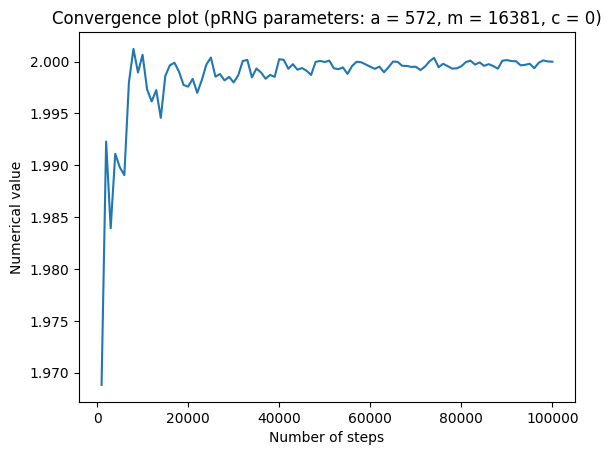

In [11]:
plt.plot(nos, integral_3)
plt.xlabel("Number of steps")
plt.ylabel("Numerical value")
plt.title("Convergence plot (pRNG parameters: a = 572, m = 16381, c = 0)")
plt.show()

# Question 3

In [2]:
prng_dist = lambda x : np.exp(-2*x)
q = lambda x: 2 - x
N = 2000
a = 0
b = 1

In [3]:
inv_transform = lambda x: -(0.5) * np.log(1 - x)
inv_sample = mylibrary.inv_transform_sampling(a, b, N, inv_transform)

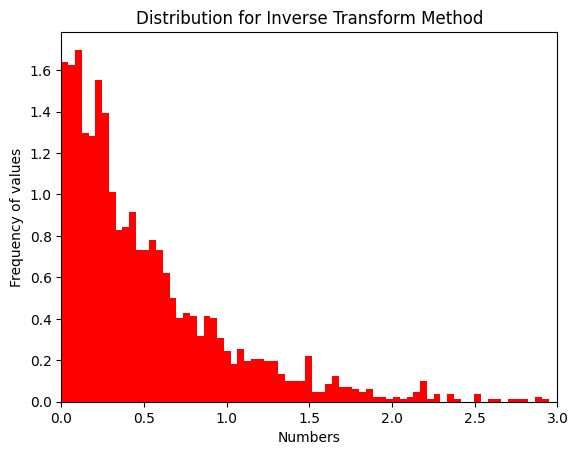

In [13]:
plt.hist(inv_sample, bins=100, density=True, color='red')
plt.title('Distribution for Inverse Transform Method')
plt.xlim(0, 3)
plt.xlabel('Numbers')
plt.ylabel('Frequency of values')
plt.show()

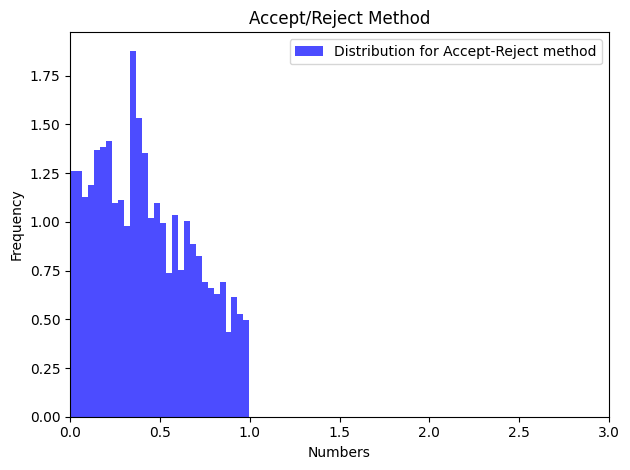

In [12]:
acc_rej_sample = mylibrary.accept_reject_sampling(N, 0, 1, prng_dist, q)

# Histogram for Accept/Reject Method
plt.hist(acc_rej_sample, bins=30, density=True, alpha=0.7, color='blue', label='Distribution for Accept-Reject method')
plt.title('Accept/Reject Method')
plt.xlim(0, 3)
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Question 4

In [28]:
def integf(x):
    return math.exp(-2*x)/(1+x**2)

def f1(x):
    return 0.5

def f2(x):
    return math.exp(-x)

def f3(x):
    return math.exp(-x/2)/(2*(1- math.exp(-0.5)))

N = 10000
a = 0
b = 2

In [23]:
def inv_f1(x):
    return 2*x

def inv_f2(x):
    return -np.log(1 - x)

def inv_f3(x):
    return -2*np.log(1 - x*(1 - np.exp(-1)))

In [25]:
is_1 = mylibrary.inv_transform_sampling(0, 1, N, inv_f1)
is_2 = mylibrary.inv_transform_sampling(0, 1, N, inv_f2)
is_3 = mylibrary.inv_transform_sampling(0, 1, N, inv_f3)

integral_1, var1 = mylibrary.mc_importance_sampling(is_1, integf, f1)
integral_2, var2 = mylibrary.mc_importance_sampling(is_2, integf, f2)
integral_3, var3 = mylibrary.mc_importance_sampling(is_3, integf, f3)

print("Here are the values of integrals using:")
print("p1(x):", round(integral_1, 5), "\tVariance:", round(var1, 5))
print("p2(x):", round(integral_2, 5), "\tVariance:", round(var2, 5))
print("p3(x):", round(integral_3, 5), "\tVariance:", round(var3, 5))

Here are the values of integrals using:
p1(x): 0.3728 	Variance: 0.50095
p2(x): 0.3851 	Variance: 0.31953
p3(x): 0.23676 	Variance: 0.22804


We see that the variance in the values for individual samples of $f(x)/p(x)$ is lowest for $p_2(x)$, and highest for $p_1(x)$. There is a large error in case of $p_3(x)$.

It can also be seen that $p_2(x)$ appears to be quite close to the function that is the integrand within the limits for the problem.